In [10]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [49]:
temp <- tempfile()
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip", temp)
student_data <- read_csv2(unz(temp, "student-mat.csv"))
unlink(temp)
student_data

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)

See spec(...) for full column specifications.



school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
MS,M,21,R,GT3,T,1,1,other,other,⋯,5,5,3,3,3,3,3,10,8,7
MS,M,18,R,LE3,T,3,2,services,other,⋯,4,4,1,3,4,5,0,11,12,10
MS,M,19,U,LE3,T,1,1,other,at_home,⋯,3,2,3,3,3,5,5,8,9,9


In [68]:
student_tidy_data <- student_data %>%
    select(c(studytime, failures, higher, famrel, absences, G3)) %>%
    mutate_at(c("studytime", "failures", "higher", "famrel"), as.factor) %>%
    mutate_if(is.numeric, function(x) (x - mean(x)) / sd(x))
student_tidy_data

studytime,failures,higher,famrel,absences,G3
<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
2,0,yes,4,0.03637833,-0.96371171
2,0,yes,5,-0.21352497,-0.96371171
2,3,yes,4,0.53618492,-0.09062427
⋮,⋮,⋮,⋮,⋮,⋮
1,3,yes,5,-0.33847662,-0.74543985
1,0,yes,4,-0.71333156,-0.09062427
1,0,yes,3,-0.08857332,-0.30889613


In [69]:
student_split <- initial_split(student_tidy_data, prop = 0.75)
student_train <- training(student_split)
student_test <- testing(student_split)

In [70]:
summary(student_train)

 studytime failures higher    famrel     absences              G3          
 1: 86     0:234    no : 13   1:  5   Min.   :-0.71333   Min.   :-2.27334  
 2:144     1: 41    yes:284   2: 11   1st Qu.:-0.71333   1st Qu.:-0.30890  
 3: 50     2:  9              3: 56   Median :-0.21352   Median : 0.12765  
 4: 17     3: 13              4:147   Mean   :-0.01116   Mean   : 0.03578  
                              5: 78   3rd Qu.: 0.28628   3rd Qu.: 0.78246  
                                      Max.   : 8.65804   Max.   : 2.09209  

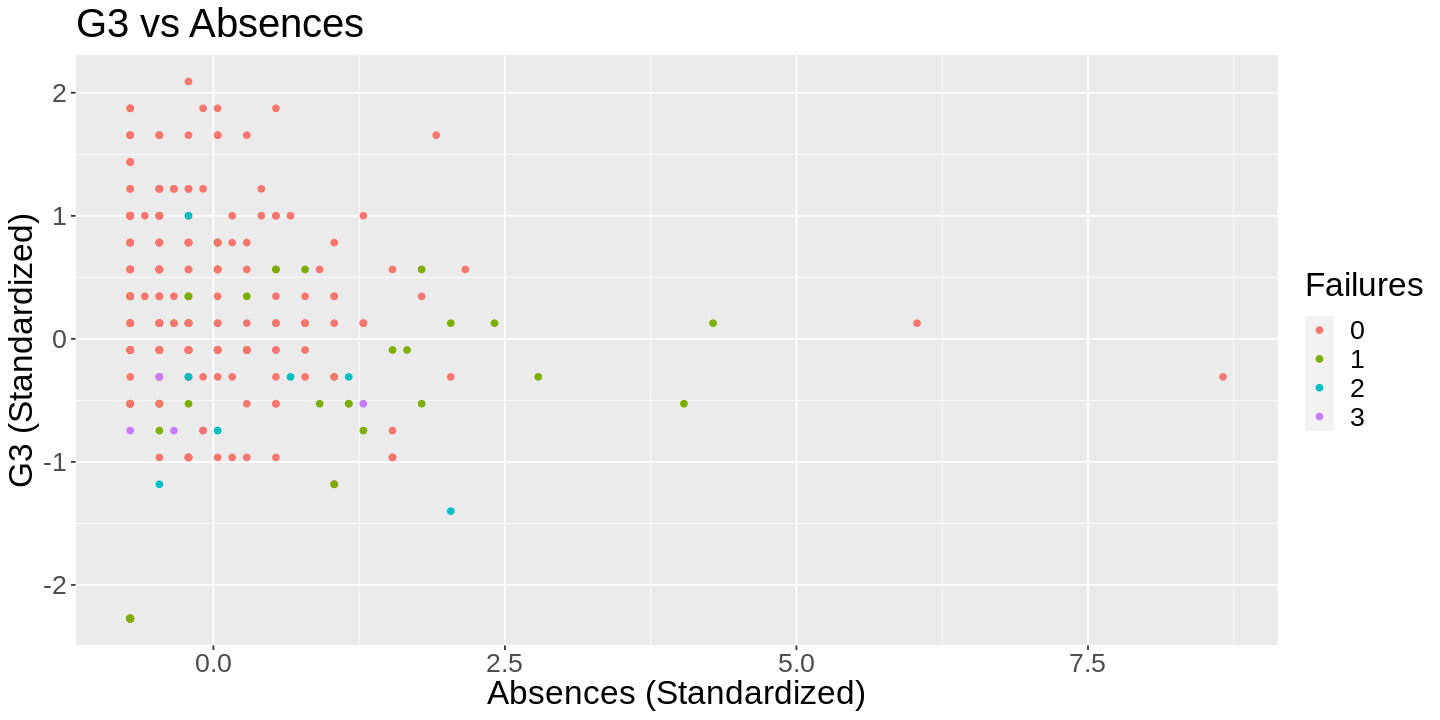

In [76]:
options(repr.plot.width = 12, repr.plot.height = 6)
regression_plot <- student_train %>%
    ggplot(aes(x = absences, y = G3, colour = failures)) +
        geom_point() +
        labs(title = "G3 vs Absences", 
             x = "Absences (Standardized)", 
             y = "G3 (Standardized)", 
             colour = "Failures") +
        theme(text = element_text(size = 20))
regression_plot